In [1]:
# Create list comprehension: squares
squares = [i**2 for i in range(0, 10)]



# Create a 5 x 5 matrix using a list of lists: matrix
matrix = [[col for col in range(5)] for row in range(5)]

# Print the matrix
for row in matrix:
    print(row)

[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]
[0, 1, 2, 3, 4]


In [3]:
# Create a list of strings: fellowship
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

# Create list comprehension: new_fellowship
new_fellowship = [member for member in fellowship if len(member) >= 7]

# Print the new list
print(new_fellowship)

['samwise', 'aragorn', 'legolas', 'boromir']


In [4]:
# Create a list of strings: fellowship
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

# Create list comprehension: new_fellowship
new_fellowship = [member if len(member) >= 7 else '' for member in fellowship]

# Print the new list
print(new_fellowship)

['', 'samwise', '', 'aragorn', 'legolas', 'boromir', '']


In [5]:
# Create a list of strings: fellowship
fellowship = ['frodo', 'samwise', 'merry', 'aragorn', 'legolas', 'boromir', 'gimli']

# Create dict comprehension: new_fellowship
new_fellowship = {member : len(member) for member in fellowship}

# Print the new dictionary
print(new_fellowship)

{'frodo': 5, 'samwise': 7, 'merry': 5, 'aragorn': 7, 'legolas': 7, 'boromir': 7, 'gimli': 5}


### !!!!!! Important Notes !!!!!!!!!!! for Generator

<br>string, list, tuple, set, dict are iterable, they are not iterator.

<br>zip object, enumerate(), generator are both iterable and iterator.

<br>Generator is a special iterable created by function having yield keyword in its body.

<br>iter() makes iterables iterator.

<br>we can traverse in iter

In [6]:
# Create list object: result
result = [num for num in range(0,5)]
# !!!!!!!Caution ---- square brackets VS paranthesis !!!!!!!!!!!
# Create generator object: result
result = (num for num in range(0,5))

# Print the first 5 values
print(next(result))
print(next(result))

print("pause and continue with for loop")
# Print the rest of the values
for value in result:
    print(value)

0
1
pause and continue with for loop
2
3
4


In [7]:
# Create a list of strings
lannister = ['cersei', 'jaime', 'tywin', 'tyrion', 'joffrey']

# Define generator function get_lengths
def get_lengths(input_list):
    """Generator function that yields the
    length of the strings in input_list."""

    # Yield the length of a string
    for person in input_list:
        yield len(person)

# Print the values generated by get_lengths()
for value in get_lengths(lannister):
    print(value)

6
5
5
6
7


In [8]:
import pandas as pd
df = pd.read_csv("Datasets/tweets.csv")
# Extract the created_at column from df: tweet_time
tweet_time = df['created_at']

# Extract the clock time: tweet_clock_time
tweet_clock_time = [entry[11:19] for entry in tweet_time if int(entry[17:19]) == 17 ]

# Print the extracted times
print(tweet_clock_time)

['23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17', '23:40:17']


In [9]:
feature_names = ['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode', 'Year', 'Value']
row_vals = ['Arab World', 'ARB', 'Adolescent fertility rate (births per 1,000 women ages 15-19)',
            'SP.ADO.TFRT', '1960', '133.56090740552298']
# Zip lists: zipped_lists
zipped_lists = zip(feature_names, row_vals)

# Create a dictionary: rs_dict
rs_dict = dict(zipped_lists)

# Print the dictionary
print(rs_dict)

{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'IndicatorCode': 'SP.ADO.TFRT', 'Year': '1960', 'Value': '133.56090740552298'}


In [10]:
# Turn list of dicts into a DataFrame: df
df = pd.DataFrame(list(rs_dict))

# Print the head of the DataFrame
print(df.head())

               0
0    CountryName
1    CountryCode
2  IndicatorName
3  IndicatorCode
4           Year


In [11]:
# Open a connection to the file
with open('Datasets/world_dev_ind.csv') as file:

    # Skip the column names
    file.readline()

    # Initialize an empty dictionary: counts_dict
    counts_dict = {}

    # Process only the first 5 rows
    for j in range(5):

        # Split the current line into a list: line
        line = file.readline().split(',')

        # Get the value for the first column (country name): first_col 
        first_col = line[0]

        # If the column value is in the dict, increment its value
        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1

        # Else, add to the dict and set value to 1
        else:
            counts_dict[first_col] = 1

# Print the resulting dictionary
print(counts_dict)

{'Arab World': 1, 'Caribbean small states': 1, 'Central Europe and the Baltics': 1, 'East Asia & Pacific (all income levels)': 1, 'East Asia & Pacific (developing only)': 1}


In [12]:
# Define read_large_file()
def read_large_file(file_object):
    """A generator function to read a large file lazily."""

    # Loop indefinitely until the end of the file
    while True:

        # Read a line from the file: data
        data = file_object.readline()

        # Break if this is the end of the file
        if not data:
            break

        # Yield the line of data
        yield data
        
# Open a connection to the file
with open('Datasets/world_dev_ind.csv') as file:

    # Create a generator object for the file: gen_file
    gen_file = read_large_file(file)

    # Print the first two lines of the file
    print(next(gen_file))
    print(next(gen_file))

CountryName,CountryCode,Year,Total Population,Urban population (% of total)

Arab World,ARB,1960,92495902.0,31.285384211605397



In [13]:
# Initialize reader object: df_reader
df_reader = pd.read_csv('Datasets/world_dev_ind.csv', chunksize=2)

# Print two chunks
print(next(df_reader))
print(next(df_reader))

              CountryName CountryCode  Year  Total Population  \
0              Arab World         ARB  1960        92495902.0   
1  Caribbean small states         CSS  1960         4190810.0   

   Urban population (% of total)  
0                      31.285384  
1                      31.597490  
                               CountryName CountryCode  Year  \
2           Central Europe and the Baltics         CEB  1960   
3  East Asia & Pacific (all income levels)         EAS  1960   

   Total Population  Urban population (% of total)  
2      9.140158e+07                      44.507921  
3      1.042475e+09                      22.471132  


In [14]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('Datasets/world_dev_ind.csv', chunksize=500)

# Get the first DataFrame chunk: df_urb_pop
df_urb_pop = next(urb_pop_reader)

# Check out specific country: df_pop_ceb
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode']=="CEB"]
print(df_pop_ceb)

# Zip DataFrame columns of interest: pops
pops = zip(df_pop_ceb['Total Population'], df_pop_ceb['Urban population (% of total)'])

# Turn zip object into list: pops_list
pops_list = list(pops)

# Print pops_list
print(pops_list)

                        CountryName CountryCode  Year  Total Population  \
2    Central Europe and the Baltics         CEB  1960        91401583.0   
244  Central Europe and the Baltics         CEB  1961        92237118.0   
486  Central Europe and the Baltics         CEB  1962        93014890.0   

     Urban population (% of total)  
2                        44.507921  
244                      45.206665  
486                      45.866565  
[(91401583.0, 44.5079211390026), (92237118.0, 45.206665319194), (93014890.0, 45.866564696018)]


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


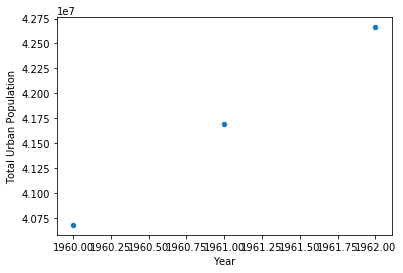

In [16]:
import matplotlib.pyplot as plt
# Use list comprehension to create new DataFrame column 'Total Urban Population'
df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]

# Plot urban population data
df_pop_ceb.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


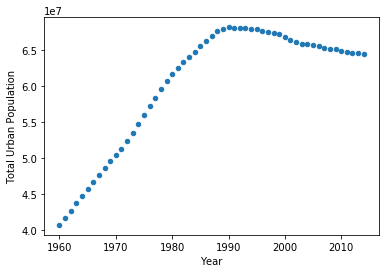

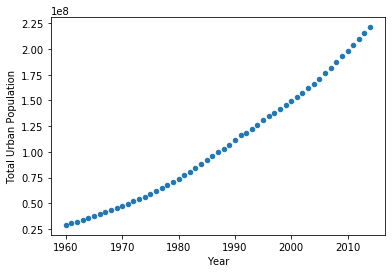

In [17]:
# Define plot_pop()
def plot_pop(filename, country_code):

    # Initialize reader object: urb_pop_reader
    urb_pop_reader = pd.read_csv(filename, chunksize=500)

    # Initialize empty DataFrame: data
    data = pd.DataFrame()
    
    # Iterate over each DataFrame chunk
    for df_urb_pop in urb_pop_reader: # It scan all of the csv file 500 each 500 each. 
        # Check out specific country: df_pop_ceb
        df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == country_code]

        # Zip DataFrame columns of interest: pops
        pops = zip(df_pop_ceb['Total Population'],
                    df_pop_ceb['Urban population (% of total)'])

        # Turn zip object into list: pops_list
        pops_list = list(pops)

        # Use list comprehension to create new DataFrame column 'Total Urban Population'
        df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup in pops_list]
    
        # Append DataFrame chunk to data: data
        data = data.append(df_pop_ceb)

    # Plot urban population data
    data.plot(kind='scatter', x='Year', y='Total Urban Population')
    plt.show()

# Set the filename: fn
fn = 'Datasets/world_dev_ind.csv'

# Call plot_pop for country code 'CEB'
plot_pop(fn, "CEB")

# Call plot_pop for country code 'ARB'
plot_pop(fn, "ARB")

In [9]:
import pandas as pd

poker_hands = pd.read_csv('Datasets/poker_hand.csv')
gen = poker_hands.iterrows()
print(next(gen), next(gen)[0], next(gen)[1])

(0, S1        1
R1       10
S2        1
R2       11
S3        1
R3       13
S4        1
R4       12
S5        1
R5        1
Class     9
Name: 0, dtype: int64) 1 S1        3
R1       12
S2        3
R2       11
S3        3
R3       13
S4        3
R4       10
S5        3
R5        1
Class     9
Name: 2, dtype: int64
